# Original text

## Problem-3: Solving 0‚Äì1 Knapsack Problem Using Bees Algorithm (BA)  
Overview
Use the Bees Algorithm (BA) to solve 0‚Äì1 Knapsack problem‚Äî pick the best items under a
weight limit. Here, the aim is to select a subset of items with maximum total value without
exceeding a weight capacity.


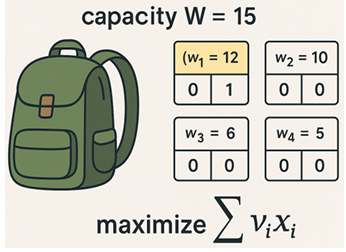




Problem Description
You are given n items. Each item i has value ùë£> 0	and weight ùë§> 0. Choose a subset to
maximize total value while keeping total weight ‚â§ ùëä.
Decision: ùë• ‚àà {0,1}	(1 = take item ùëñ, 0 = skip).
Objective (maximize):

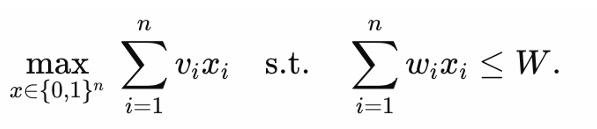

maximize:    sum(v_i * x_i) for i = 1..n \
subject to:  sum(w_i * x_i) <= W \
x_i ‚àà {0, 1}

(If your code minimizes, use fitness = -sum(v_i * x_i) with a feasibility repair or penalty.)



Data Requirements (explicit, public)
Use OR-Library 0/1 knapsack instances.
* OR-Library ‚Äì Multidimensional Knapsack (MKP) info & downloads (incl. classic
literature sets):  
https://people.brunel.ac.uk/~mastjjb/jeb/orlib/mknapinfo.html
* Pisinger‚Äôs ‚Äúhard‚Äù 0/1 knapsack instances (knapPI_‚Ä¶ series) + generators + solutions:
https://hjemmesider.diku.dk/~pisinger/codes.html
* Optional extra) Small 0/1 knapsack datasets for teaching (Burkardt collection):
https://people.sc.fsu.edu/~jburkardt/datasets/knapsack_01/knapsack_01.html
In your report, name the exact instance IDs you solved (e.g., weing1, weing2, or
knapPI_1_50_100).

Evaluation Protocol
* Instances: solve at least 6 (six) named OR-Library instances (small, medium, large).
* Metrics:
  * Primary: best value ùëâ(ùë•) (feasible).
  * Secondary: runtime; iterations to best; average fitness of population.

Plots/Tables
* Convergence: iteration versus best value.
* Statistics of final best values over 10 runs (using different random seeds).
* Table: instance, n, W, best value, weight used, baseline value, improvement %.
Deliverables
* Code: BA knapsack solver (with repair) + baselines; a README (how to run on each
instance).
* Report:  
  * Instances used.
  * Implementation details, including every step and component of BA, so that the implementation can be reproduced.  
  * BA settings,  
  * Neighbourhood choices,  
  * Convergence plot,  
  * Brief discussion of sensitivity (effect of nre, nrb and ngh).
  * Plots/Tables mentioned above.

Grading / Success Criteria
* Correctness: final solution feasible (ùëä(ùë•) ‚â§ ùëä); repair implemented correctly.
* Effectiveness.
* Clarity & Reproducibility: clean code, fixed seed option, labeled figures, README.

-------------------------------------------------------
-------------------------------------------------------

# 0‚Äì1 Knapsack with the Bees Algorithm (BA)

In [1]:
from pathlib import Path
import numpy as np

data_path = Path("./data/Knapsack/mknapcb6.txt")

with open(data_path, "r") as f:
    raw = f.read().split()

print(f"Total number of entries in the file: {len(raw)}")
print("First 50 numbers in the dataset:")
print(raw[:50])


Total number of entries in the file: 165391
First 50 numbers in the dataset:
['30', '500', '10', '0', '653', '854', '738', '768', '812', '375', '452', '600', '790', '848', '1074', '748', '815', '556', '718', '821', '899', '545', '456', '833', '623', '910', '864', '421', '805', '780', '713', '453', '632', '790', '626', '895', '539', '668', '853', '800', '710', '772', '968', '409', '503', '687', '618', '486', '981', '664']


In [2]:

data = list(map(float, raw))

# The first few numbers might describe metadata (e.g., number of items or constraints)
print("First 10 values:", data[:10])

# Let's try to see if the first value could be a count (integer-like?)
print("First value (maybe number of instances?):", data[0])
print("Next few values (possibly structure info?):", data[1:4])


First 10 values: [30.0, 500.0, 10.0, 0.0, 653.0, 854.0, 738.0, 768.0, 812.0, 375.0]
First value (maybe number of instances?): 30.0
Next few values (possibly structure info?): [500.0, 10.0, 0.0]


Instances = 30.0 \
structure = 500.0, 10.0, 0.0

In [3]:

ptr = 0
num_instances = int(data[ptr]); ptr += 1

# Maybe these represent (n, m, instance_id)?
n = int(data[ptr]); ptr += 1
m = int(data[ptr]); ptr += 1
ptr += 1  # An extra 0
print(f"\nPossible structure: n={n}, m={m}")


Possible structure: n=500, m=10



The next 500 values seem like a list of positive numbers (likely 'profits' or 'values').\
First 10 profit-like values: [653. 854. 738. 768. 812. 375. 452. 600. 790. 848.]

The dataset seems to describe:
- 500 items
- 10 constraints
- A 10√ó500 matrix of coefficients
- And a vector of 10 capacity limits

In [4]:
# Let's see what the next n numbers look like ‚Äî maybe profits or weights?
profits = np.array(data[ptr:ptr+n]); ptr += n
print(f"\nThe next {n} values seem like a list of positive numbers (likely 'profits' or 'values').")
print("First 10 profit-like values:", profits[:10])

# Then we appear to have several rows of coefficients ‚Äî maybe resource constraints
rows = []
for _ in range(m):
    row = np.array(data[ptr:ptr+n])
    rows.append(row)
    ptr += n
constraints = np.vstack(rows)

# Finally, there are probably m capacity values
capacities = np.array(data[ptr:ptr+m]); ptr += m

print("Shapes and a quick sample:")
print("profits shape:", profits.shape)
print("constraints shape:", constraints.shape)
print("capacities shape:", capacities.shape)
print("First few capacities:", capacities)


The next 500 values seem like a list of positive numbers (likely 'profits' or 'values').
First 10 profit-like values: [653. 854. 738. 768. 812. 375. 452. 600. 790. 848.]
Shapes and a quick sample:
profits shape: (500,)
constraints shape: (10, 500)
capacities shape: (10,)
First few capacities: [60589. 62150. 59432. 61740. 62977. 61186. 60721. 60640. 65126. 57802.]


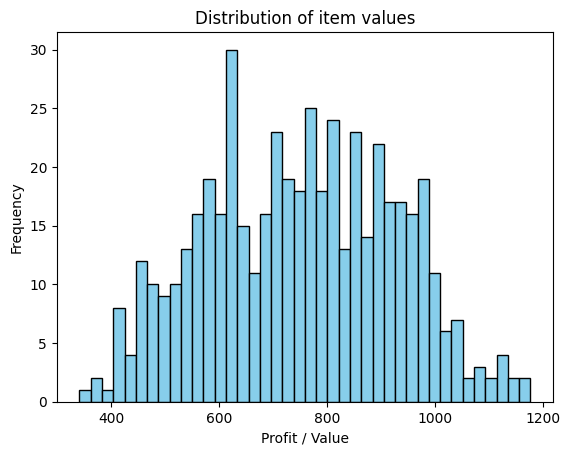

In [5]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(profits, bins=40, color="skyblue", edgecolor="black")
plt.title("Distribution of item values")
plt.xlabel("Profit / Value")
plt.ylabel("Frequency")
plt.show()

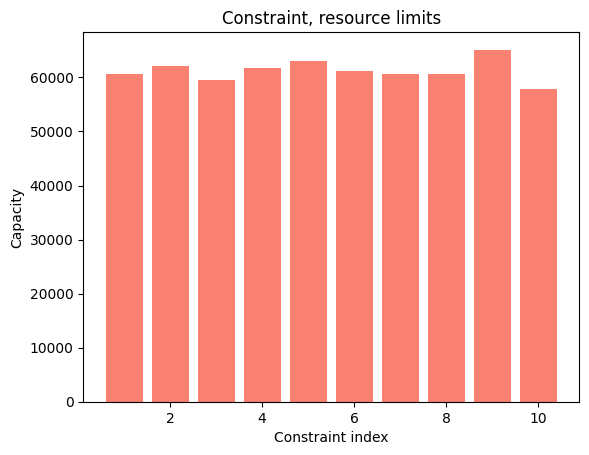

In [6]:
plt.figure()
plt.bar(np.arange(len(capacities))+1, capacities, color="salmon")
plt.title("Constraint, resource limits")
plt.xlabel("Constraint index")
plt.ylabel("Capacity")
plt.show()



## Short aliases to match the math

Because it has 10 constraints, it is a Multidimensional Knapsack Problem (MKP)\
The math looks like this:

$$
\max_{x \in \{0,1\}^n} \; p^{\top} x 
\quad \text{s.t.} \quad A x \le b
$$

In [7]:
# Short aliases to match the math
p = profits          # (n,) item profits/values
A = constraints      # (m, n) resource usage
b = capacities       # (m,) resource limits
n, m = p.size, A.shape[0]
print(f"n={n}, m={m}")



n=500, m=10



## Add Feasibility and repair to produce valid solutions


In [8]:

import numpy as np

def is_feasible(x, A, b):
    return np.all(A @ x <= b + 1e-9)

def make_surrogate_weights(A, b):
    b_safe = np.maximum(b, 1e-12)
    w = (A / b_safe[:, None]).sum(axis=0)
    return np.where(w <= 1e-12, 1e-12, w)

def repair_to_feasible(x, p, A, b):
    x = np.asarray(x, dtype=int).copy()
    if is_feasible(x, A, b):
        return x
    w_surr = make_surrogate_weights(A, b)
    ratio = p / w_surr
    # Drop worst ratio until feasible
    while not is_feasible(x, A, b):
        chosen = np.where(x == 1)[0]
        if chosen.size == 0: break
        x[chosen[np.argmin(ratio[chosen])]] = 0
    # Greedy fill
    remaining = np.where(x == 0)[0]
    for j in remaining[np.argsort(-ratio[remaining])]:
        x_try = x.copy(); x_try[j] = 1
        if is_feasible(x_try, A, b): x = x_try
    return x




## Create two basleines to compare BA


In [9]:

import numpy as np, random

def total_profit(x, p): return float(np.dot(p, x))

# Greedy (profit / surrogate weight)
sur_w = make_surrogate_weights(A, b)
ratio = p / (sur_w + 1e-12)
order = np.argsort(-ratio)
x_g = np.zeros(n, dtype=int)
for j in order:
    x_try = x_g.copy(); x_try[j] = 1
    if is_feasible(x_try, A, b):
        x_g = x_try

print("Greedy:")
print(" feasible:", is_feasible(x_g, A, b))
print(" value:", total_profit(x_g, p))

# Random-feasible (with repair), keep the best
best_val, best_x = -1.0, None
rng = np.random.default_rng(0)
for _ in range(500):
    x0 = (rng.random(n) < 0.5).astype(int)
    xr = repair_to_feasible(x0, p, A, b)
    val = total_profit(xr, p)
    if val > best_val:
        best_val, best_x = val, xr

print("\nRandom+repair:")
print(" feasible:", is_feasible(best_x, A, b))
print(" value:", best_val)



Greedy:
 feasible: True
 value: 113834.0

Random+repair:
 feasible: True
 value: 110681.0



## Bees Algorithm


In [10]:

import numpy as np, random, math
import matplotlib.pyplot as plt

# Settings
params = dict(pop_size=40, n_sites=12, n_elite=4, nre=12, nrb=6,
              n_scout=8, ngh=3, max_iter=200, seed=42)

rng = random.Random(params["seed"])
np_rng = np.random.default_rng(params["seed"])

def flip_bits(x, k):
    if k <= 0: return x.copy()
    idx = rng.sample(range(len(x)), k)
    y = x.copy(); y[idx] = 1 - y[idx]; return y

def neighbor(x, ngh):
    k = rng.randint(1, max(1, ngh))
    return flip_bits(x, k)

def evaluate(x):
    x = repair_to_feasible(x, p, A, b)
    return total_profit(x, p), x

# init
pop, fits = [], []
for _ in range(params["pop_size"]):
    x0 = (np_rng.random(n) < 0.5).astype(int)
    f, x0 = evaluate(x0)
    pop.append(x0); fits.append(f)
fits = np.array(fits, float)

best_idx = int(np.argmax(fits))
best_x = pop[best_idx].copy()
best_f = float(fits[best_idx])
history = [best_f]

for it in range(params["max_iter"]):
    order = np.argsort(-fits)
    pop = [pop[i] for i in order]
    fits = fits[order]

    sites = pop[:params["n_sites"]]
    new_pop = pop.copy()

    for s_idx, x_site in enumerate(sites):
        recruits = params["nre"] if s_idx < params["n_elite"] else params["nrb"]
        local_f, local_x = evaluate(x_site)
        for _ in range(recruits):
            y = neighbor(x_site, params["ngh"])
            fy, y = evaluate(y)
            if fy > local_f:
                local_f, local_x = fy, y
        new_pop[s_idx] = local_x

    # scouts
    for _ in range(params["n_scout"]):
        y = (np_rng.random(n) < 0.5).astype(int)
        fy, y = evaluate(y)
        # replace a random in the worst half if better
        idx = rng.randrange(params["pop_size"]//2, params["pop_size"])
        f_old, _ = evaluate(new_pop[idx])
        if fy > f_old:
            new_pop[idx] = y

    pop = new_pop
    fits = np.array([evaluate(ind)[0] for ind in pop], float)

    curr = float(fits.max())
    if curr > best_f + 1e-12:
        best_f = curr
        best_x = pop[int(np.argmax(fits))].copy()
    history.append(best_f)

print("feasible:", is_feasible(best_x, A, b))
print("best value:", best_f)
print("capacity use (first 5):", (A @ best_x)[:5], " / ", b[:5])


feasible: True
best value: 116671.0
capacity use (first 5): [60586. 61832. 59344. 61052. 62197.]  /  [60589. 62150. 59432. 61740. 62977.]


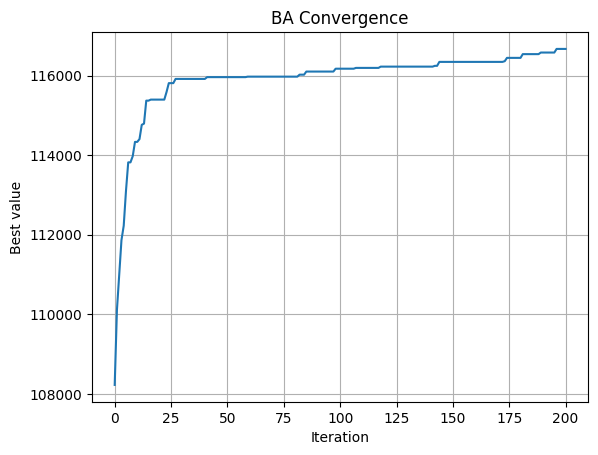

In [11]:

plt.figure()
plt.plot(history)
plt.xlabel("Iteration"); plt.ylabel("Best value")
plt.title("BA Convergence")
plt.grid(True); plt.show()



In [12]:

import pandas as pd

summary = pd.DataFrame([{
    "instance": "mknapcb6-1",
    "n": n, "m": m,
    "greedy_value": total_profit(x_g, p),
    "random_value": best_val,
    "ba_value": best_f
}])
summary


instance    n   m  greedy_value  random_value  ba_value
0  mknapcb6-1  500  10      113834.0      110681.0  116671.0